# Import librairies

In [29]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read data
data = pd.read_csv("heartDisease.csv")

In [3]:
#first 5 lines
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# EDA with pandas profiling

In [4]:
from pandas_profiling import ProfileReport

In [5]:
report = ProfileReport(data , title="EDA with pandas profiling")

In [6]:
report

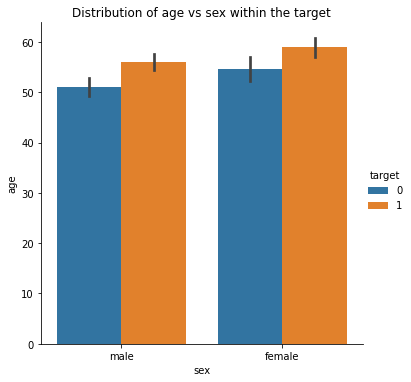

In [7]:
#barplot of age vs sex with hue = target
sns.catplot(kind="bar",data=data, x="sex",y="age" , hue="target")
plt.title("Distribution of age vs sex within the target")
plt.show()

# Dealing with missing values

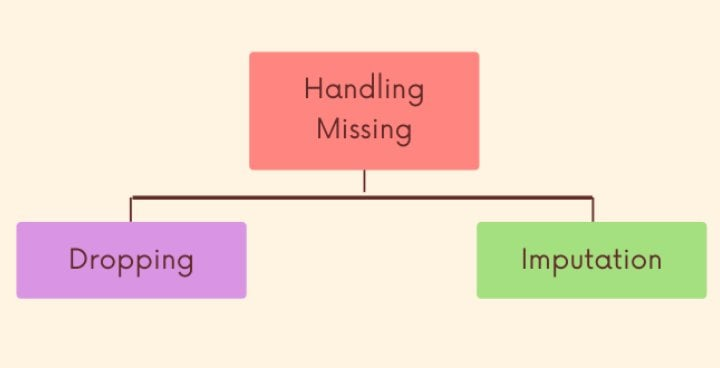

In [8]:
data["ca"]=data.ca.fillna(data.ca.mean())
data["thal"]=data.thal.fillna(data.thal.mean())

In [9]:
data.isnull().sum().sum()

0

# Transform the categorical Data

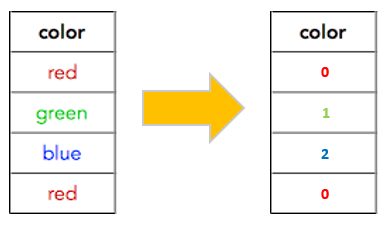

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["sex"]=le.fit_transform(data.sex)

# Split data to train 

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## **Scaling Data**

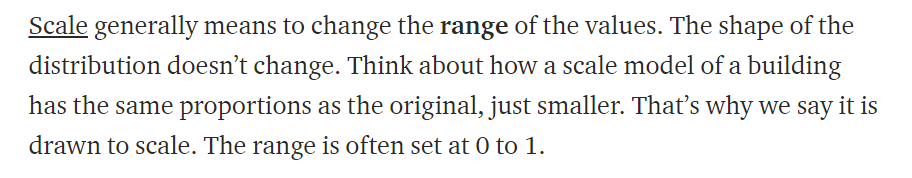

## **Why scaling?**

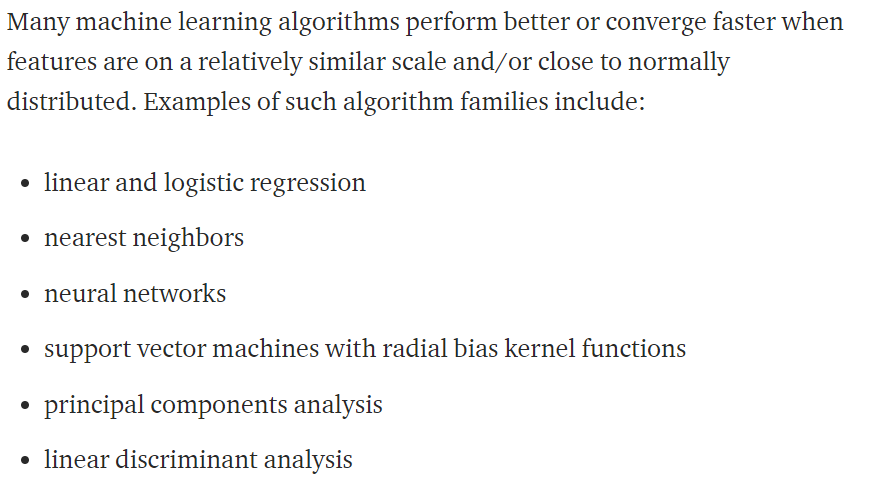

## **Standard scaler**
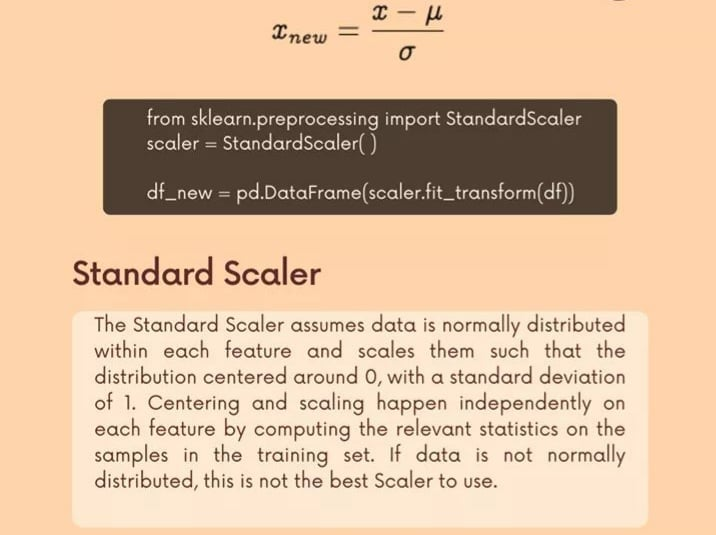

In [13]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# SVM

In [14]:
from sklearn.svm import SVC
model1 = SVC(kernel="rbf")
model1.fit(X_train,y_train)

SVC()

In [15]:
y_pred = model1.predict(X_test)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

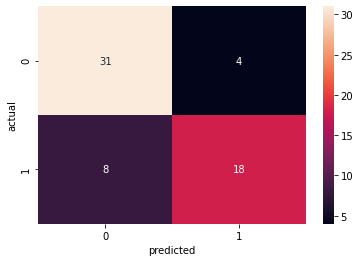

In [16]:
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=["actual"],colnames=["predicted"])
sns.heatmap(confusion_matrix , annot=True)

In [17]:
print("accuracy for testing set for SVM =  {}".format((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)))

accuracy for testing set for SVM =  0.8032786885245902


# **NAIVE BAYES**

In [18]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred1 = model2.predict(X_test)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

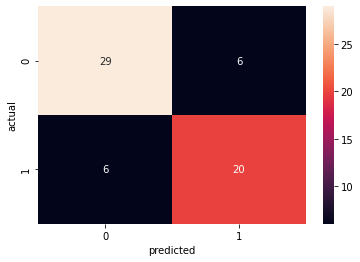

In [20]:
confusion_matrix = pd.crosstab(y_test , y_pred1 ,rownames=["actual"],colnames=["predicted"])
sns.heatmap(confusion_matrix,annot=True)

In [21]:
print("accuracy for testing set for naive bayes = {}".format((confusion_matrix[0][0] + confusion_matrix[1][1])/len(y_test)))

accuracy for testing set for naive bayes = 0.8032786885245902


# **LOGISTIC REGRESSION**

In [22]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred2 = model3.predict(X_test)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

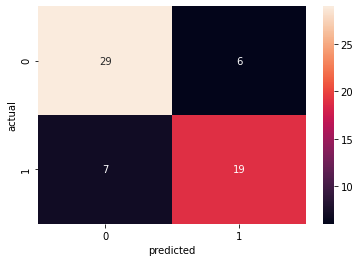

In [24]:
confusion_matrix = pd.crosstab(y_test , y_pred2,rownames=["actual"],colnames=["predicted"])
sns.heatmap(confusion_matrix , annot=True)

In [25]:
print("accuracy for testing set for logistic Regression = {}".format((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)))

accuracy for testing set for logistic Regression = 0.7868852459016393


# Plot ROC and compare AUC

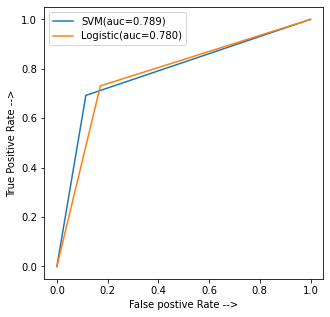

In [26]:
from sklearn.metrics import roc_curve,auc
logistic_fpr , logistic_tpr , threshhold = roc_curve(y_test,y_pred2)
auc_logistic = auc(logistic_fpr , logistic_tpr)

svm_fpr , svm_tpr , threshhold = roc_curve(y_test,y_pred)
auc_svm = auc(svm_fpr,svm_tpr)

plt.figure(figsize=(5,5))
plt.plot(svm_fpr , svm_tpr , linestyle='-',label='SVM(auc=%0.3f)' %auc_svm)
plt.plot(logistic_fpr , logistic_tpr ,label="Logistic(auc=%0.3f)" %auc_logistic)

plt.xlabel('False postive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()